### Starting MatLab engine

In [1]:
import matlab.engine
eng = matlab.engine.start_matlab()

### Extracting statistics
Reading all MIDIs and extracting $\mathbf{R}^{24}$ dimensional statistics for each. Each $\mathbf{R}^{24}$ vector corresponds with mean, standard deviation and entropy of lengths of $H_0$ and $H_1$ persistent homologies for each string instrument.

In [2]:
import os
from tqdm import tqdm
from util import ProcessMatrices, ParseHTML

composers = ['Beethoven', 'Haydn', 'Mozart']


def GetStats(max_homology_dim=2, normalize=True, columns_as_vertices=False):
    stats = dict(zip(composers, [{}, {}, {}]))

    main_path = "midis/"
    mats_path = "mats/"

    corrupted_files = []

    for composer in composers:
        comp_path = os.path.join(main_path, composer)
        for f in tqdm(os.listdir(comp_path)):
            try:
                eng.probs(os.path.join(comp_path, f), mats_path, nargout=1)
                stats[composer][f], _ = ProcessMatrices(mats_path, max_homology_dim, normalize, columns_as_vertices)

            except:
                corrupted_files.append(f)

    print(corrupted_files)
    
    return stats, corrupted_files

### Calculating and visualizing statistics

PCA(2) distribution of pieces of a given genre

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def StatPCA(gen='Andante'):

    gen_names = dict(zip(composers, map(lambda x: sorted(list(names_for_genres[x][gen])), composers)))
    gen_beethoven = np.array(list(map(lambda x: stats['Beethoven'][x], gen_names['Beethoven'])))
    gen_mozart = np.array(list(map(lambda x: stats['Mozart'][x], gen_names['Mozart'])))
    gen_haydn = np.array(list(map(lambda x: stats['Haydn'][x], gen_names['Haydn'])))

    gen_all = np.concatenate([gen_beethoven, gen_mozart, gen_haydn], axis=0)
    pca = PCA(2)
    pca.fit(gen_all)

    pca_beethoven = pca.transform(gen_beethoven)
    pca_mozart = pca.transform(gen_mozart)
    pca_haydn = pca.transform(gen_haydn)

    plt.scatter(pca_beethoven[:,0], pca_beethoven[:,1], c='blue', label='Beethoven', linewidth=0.1, alpha=0.5)
    plt.scatter(pca_mozart[:,0], pca_mozart[:,1], c='red', label='Mozart', linewidth=0.1, alpha=0.5)
    plt.scatter(pca_haydn[:,0], pca_haydn[:,1], c='green', label='Haydn', linewidth=0.1, alpha=0.5)

    plt.legend()
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    plt.title(f'{gen} PCA')
    plt.show()
    
    plt.bar(composers, [np.std(pca_beethoven), np.std(pca_haydn), np.std(pca_mozart)])
    plt.title('Standard deviation of PCA decomposotion')
    plt.show()

### PCA(2) distribution and standard deviation of Haydn's pieces of different genres

In [4]:
def StatPCAGenre():
    genres_haydn = ['Allegro', 'Allegretto', 'Presto', 'Adagio', 'Andante', 'Vivace', 'Menuetto']
    colors = ['blue', 'red', 'green', 'yellow', 'orange', 'black', 'purple']

    genres_arr = []
    for genre in genres_haydn:
        genres_arr.append(np.array(list(map(lambda x: stats['Haydn'][x], names_for_genres['Haydn'][genre]))))

    gen_haydn_all = np.concatenate(genres_arr, axis=0)
    pca_haydn = PCA(2)
    pca_haydn.fit(gen_haydn_all)

    pca_arr = list(map(pca_haydn.transform, genres_arr))
    for i in range(len(genres_haydn)):
        plt.scatter(pca_arr[i][:,0], pca_arr[i][:,1], c=colors[i], label=genres_haydn[i], linewidth=0.1, alpha=0.5)

    plt.legend()
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    plt.title('Haydn PCA')
    plt.show()

    plt.bar(genres_haydn, list(map(np.std, pca_arr)))
    plt.title('Standard deviation of PCA decomposotion')
    plt.show()

In [5]:
argsss = [{'max_homology_dim':2, 'normalize':True, 'columns_as_vertices':False},
         {'max_homology_dim':3, 'normalize':True, 'columns_as_vertices':False},
         {'max_homology_dim':2, 'normalize':False, 'columns_as_vertices':False},
         {'max_homology_dim':3, 'normalize':False, 'columns_as_vertices':False},
         {'max_homology_dim':2, 'normalize':True, 'columns_as_vertices':True},
         {'max_homology_dim':3, 'normalize':True, 'columns_as_vertices':True},
         {'max_homology_dim':2, 'normalize':False, 'columns_as_vertices':True},
         {'max_homology_dim':3, 'normalize':False, 'columns_as_vertices':True},]

### Getting stats

In [6]:
stats, cf = GetStats(**argsss[0])
genres, names_for_genres = ParseHTML(cf)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:08<00:00,  1.72s/it]

['Be18n3m2.mid', 'Be18n3m3.mid', 'Be74m4.mid', 'H55n1m1.mid', 'H64n2m4.mid', 'H64n3m1.mid', 'H64n3m4.mid', 'H71n2m1.mid', 'H76n3m4.mid', 'MK464m2.mid', 'MK589m3.mid', 'MK590m2.mid']


### Differnet authors, same genre

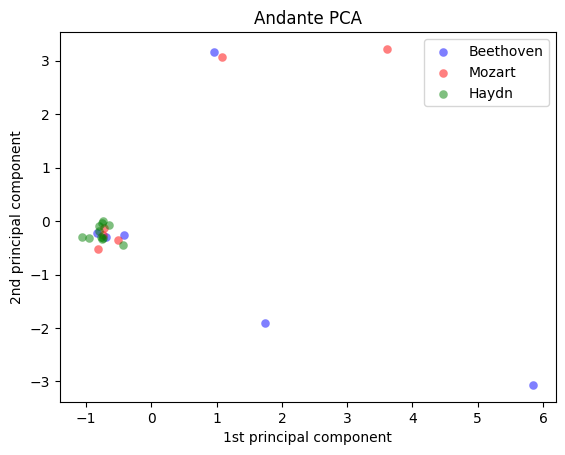

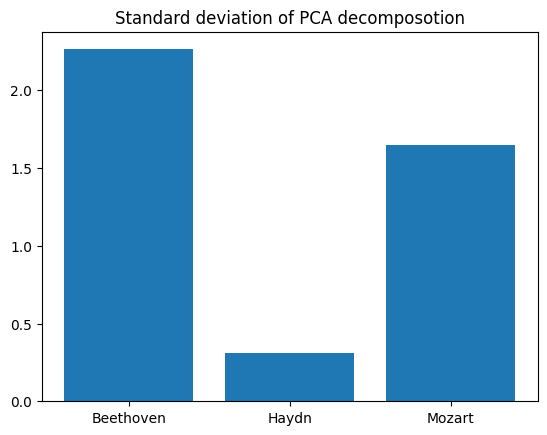

In [7]:
StatPCA('Andante')

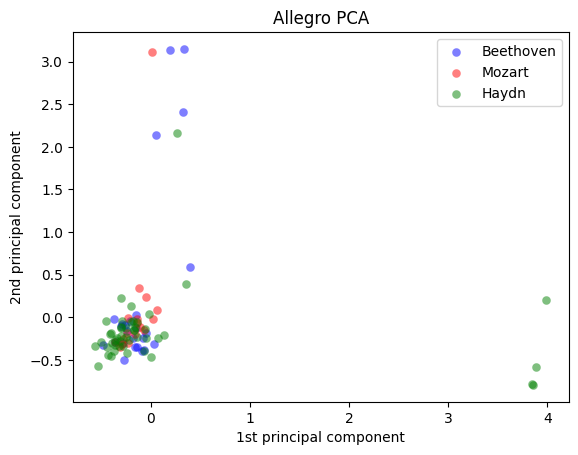

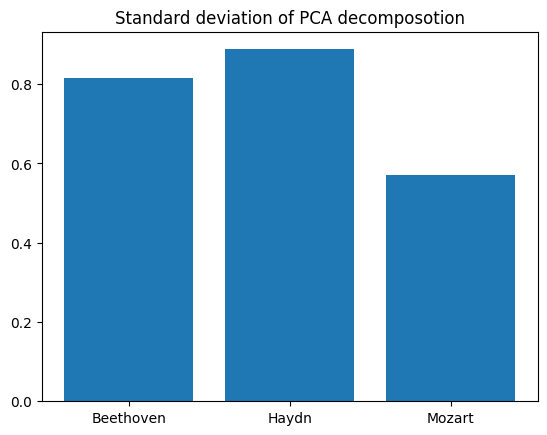

In [8]:
StatPCA('Allegro')

### All works of Haydn, Beethoven and Mozart

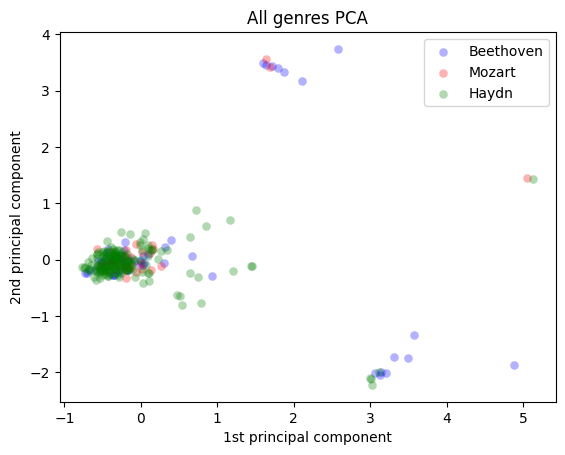

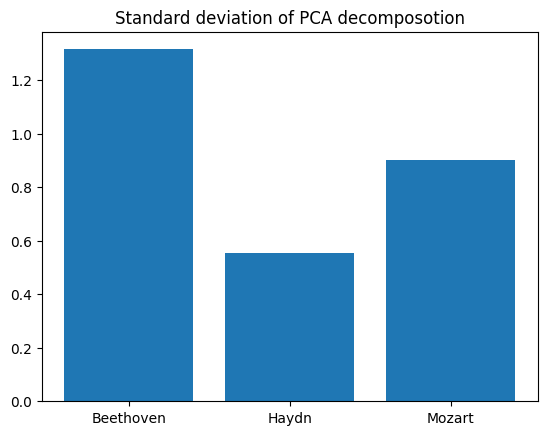

In [9]:
gen_beethoven = np.array(list(stats['Beethoven'].values()))
gen_mozart = np.array(list(stats['Mozart'].values()))
gen_haydn = np.array(list(stats['Haydn'].values()))

gen_all = np.concatenate([gen_beethoven, gen_mozart, gen_haydn], axis=0)
pca = PCA(2)
pca.fit(gen_all)

pca_beethoven = pca.transform(gen_beethoven)
pca_mozart = pca.transform(gen_mozart)
pca_haydn = pca.transform(gen_haydn)

plt.scatter(pca_beethoven[:,0], pca_beethoven[:,1], c='blue', label='Beethoven', linewidth=0.1, alpha=0.3)
plt.scatter(pca_mozart[:,0], pca_mozart[:,1], c='red', label='Mozart', linewidth=0.1, alpha=0.3)
plt.scatter(pca_haydn[:,0], pca_haydn[:,1], c='green', label='Haydn', linewidth=0.1, alpha=0.3)

plt.legend()
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title(f'All genres PCA')
plt.show()

plt.bar(composers, [np.std(pca_beethoven), np.std(pca_haydn), np.std(pca_mozart)])
plt.title('Standard deviation of PCA decomposotion')
plt.show()

### Different genres, same author


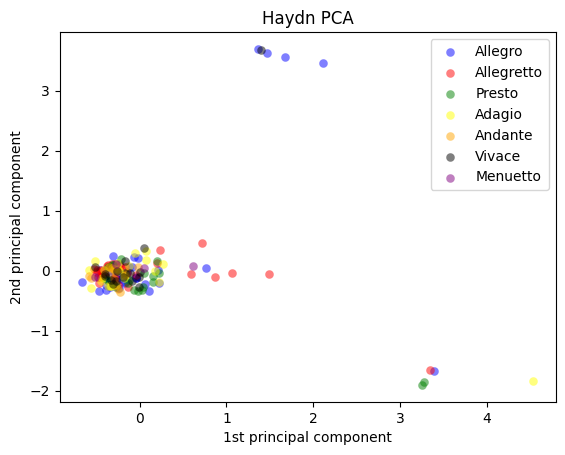

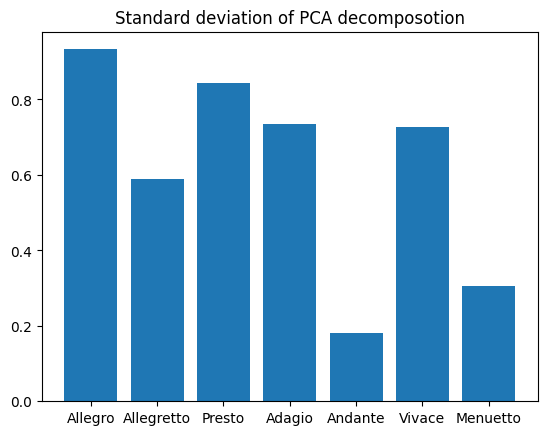

In [10]:
StatPCAGenre()

### Comparison with the article

#### Symmetrical distance and Vietoris-Rips complex

In [11]:
# eng.persistence(r'midis\Haydn\H20n1m1.mid', nargout=1) # better call from MATLAB directly

C:\Users\zaiaz\AppData\Roaming\Python\Python39\site-packages\gudhi\persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Axes: title={'center': 'Persistence barcode'}>

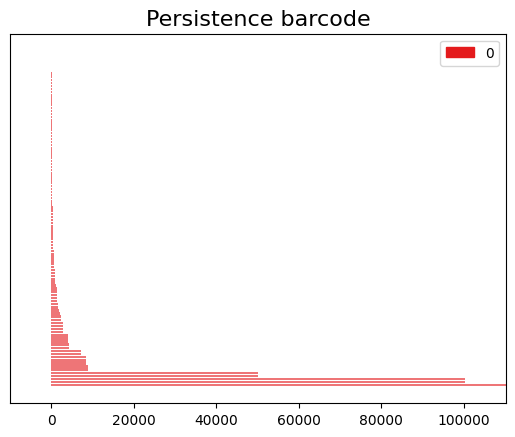

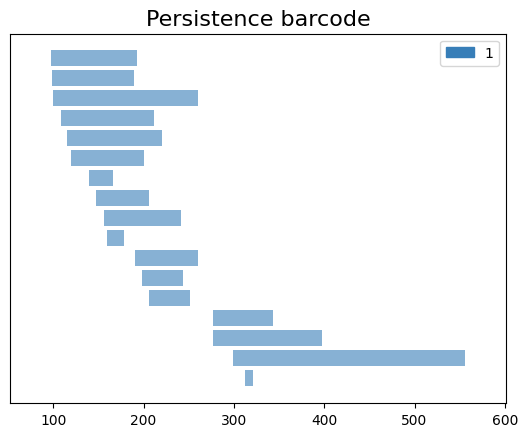

In [12]:
import gudhi

arr = [[], []]

for i in range(2):
    name = f'midis/Haydn/H20n1m1_1_edges_SP_distmat_intervals_{i}_right_format.txt'
    with open(name) as f:
        for line in f.readlines():
            arr[i].append((i, (float(line.split()[0]), float(line.split()[1]))))

gudhi.plot_persistence_barcode(arr[0])
gudhi.plot_persistence_barcode(arr[1])

#### Bregman divergences and Cech complex

<Axes: title={'center': 'Persistence barcode'}>

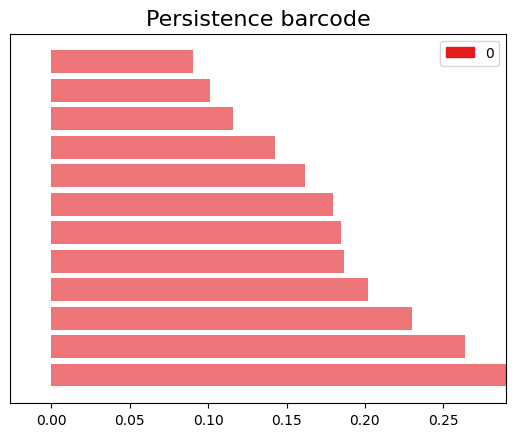

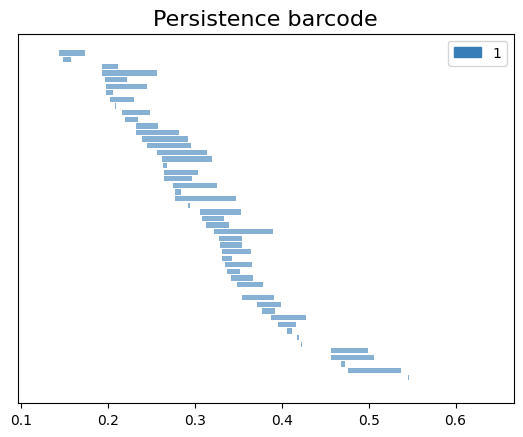

In [15]:
name = f'midis/Haydn/H20n1m1'
eng.probs(name, "mats/", nargout=1)
_, phs = ProcessMatrices("mats/", max_homology_dim=2, normalize=True, columns_as_vertices=False)

arr = [[], []]
arr[0] = list(map(lambda x: (0, tuple(x)), phs[0]))
arr[1] = list(map(lambda x: (1, tuple(x)), phs[1]))

gudhi.plot_persistence_barcode(arr[0])
gudhi.plot_persistence_barcode(arr[1])